In [ ]:
import os 
os.chdir('/content/drive/MyDrive/DeepLearningColab/Pytorch_Basics')
!pwd

/content/drive/MyDrive/DeepLearningColab/Pytorch_Basics


In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import torch 
import torch.nn as nn 
from torchvision import transforms,datasets 
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix,classification_report

plt.style.use('fivethirtyeight')

In [ ]:
# Load Data 
train_data = datasets.MNIST(
    root = 'Mnist_data',
    train = True,
    transform = transforms.ToTensor(),
    target_transform = None,
    download = True
)

test_data = datasets.MNIST(
    root = 'Mnist_data',
    train = False,
    transform = transforms.ToTensor(),
    target_transform = None,
    download = True
)

In [ ]:
# Check Dataset 
train_data.data[0:2]

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8)

In [ ]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [ ]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [ ]:
test_data.data.shape

torch.Size([10000, 28, 28])

Text(0.5, 0, 'Label - 5')

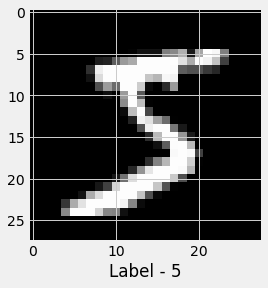

In [ ]:
# Exploring Data
plt.figure(figsize=(6,4))
plt.imshow(train_data.data[0:1].reshape(28,28),cmap='gray')
plt.xlabel('Label - '+ str(train_data.targets[0].item()))

In [ ]:
# we need to normalize this Before using !
train_data.data.max() 

tensor(255, dtype=torch.uint8)

Text(0.5, 0, 'Label - 0')

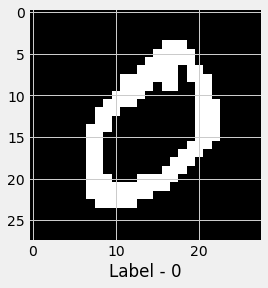

In [ ]:
# Normalized Data with torch.round
plt.figure(figsize=(6,4))
plt.imshow(torch.round(train_data.data[1]/255).reshape(28,28),cmap='gray')
plt.xlabel('Label - '+ str(train_data.targets[1].item()))

In [ ]:
# Data Loader does : -
# train_data --- reshape -- (samples,color,height,width)
batch = 128
train_data_loader = DataLoader(dataset=train_data,
                               batch_size = batch,
                               shuffle=True)

test_data_loader = DataLoader(dataset=test_data,
                               batch_size = batch)

In [ ]:
for x in test_data_loader:
  print(x[0].shape)
  print(x[1].shape)
  break

torch.Size([128, 1, 28, 28])
torch.Size([128])


In [ ]:
# Lets Create Model 
device = 'cuda' if torch.cuda.is_available() else 'cpu'

class Neural_network(nn.Module):
  def __init__(self,input,output):
    super(Neural_network,self).__init__()
    self.layers = nn.Sequential(
        nn.Linear(input,256),
        nn.ReLU(),
        nn.Linear(256,128),
        nn.ReLU(),
        nn.Linear(128,output))
    
  def forward(self,x):
    return self.layers(x)

model = Neural_network(784,10)
model.to(device)
model

Neural_network(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
n_epoch = 10
loss_ = []
acc_ = []

for epoch in range(n_epoch):
  print(f'Epoch {epoch+1}/{n_epoch} ')
  for batch,data in enumerate(train_data_loader):
    x = data[0].to(device)
    y = data[1].to(device)
    
    optimizer.zero_grad()

    y_pred = model(x.reshape(-1,784))
    loss = criterion(y_pred,y)
    loss_.append(loss.item())
    loss.backward()
    optimizer.step()
    
    accuracy = torch.mean((torch.argmax(y_pred,1) == y).float()).item()
    acc_.append(accuracy)

    if batch%100 == 0:
      print(f'   Batch {batch} Loss {loss.item():.4f} Accuracy {accuracy:.4f}')

Epoch 1/10 
   Batch 0 Loss 2.3069 Accuracy 0.1094
   Batch 100 Loss 0.2960 Accuracy 0.9219
   Batch 200 Loss 0.2423 Accuracy 0.9453
   Batch 300 Loss 0.3313 Accuracy 0.8984
   Batch 400 Loss 0.2446 Accuracy 0.9375
Epoch 2/10 
   Batch 0 Loss 0.2258 Accuracy 0.9297
   Batch 100 Loss 0.1401 Accuracy 0.9609
   Batch 200 Loss 0.0634 Accuracy 0.9922
   Batch 300 Loss 0.1724 Accuracy 0.9609
   Batch 400 Loss 0.1118 Accuracy 0.9688
Epoch 3/10 
   Batch 0 Loss 0.0964 Accuracy 0.9844
   Batch 100 Loss 0.0776 Accuracy 0.9766
   Batch 200 Loss 0.1290 Accuracy 0.9453
   Batch 300 Loss 0.0508 Accuracy 0.9766
   Batch 400 Loss 0.0345 Accuracy 0.9922
Epoch 4/10 
   Batch 0 Loss 0.0480 Accuracy 0.9922
   Batch 100 Loss 0.0858 Accuracy 0.9688
   Batch 200 Loss 0.0550 Accuracy 0.9844
   Batch 300 Loss 0.0615 Accuracy 0.9766
   Batch 400 Loss 0.0681 Accuracy 0.9766
Epoch 5/10 
   Batch 0 Loss 0.0298 Accuracy 0.9922
   Batch 100 Loss 0.0150 Accuracy 0.9922
   Batch 200 Loss 0.0768 Accuracy 0.9688
   Batc

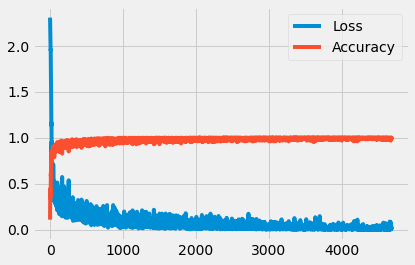

In [ ]:
# Only For Train acc and loss 
pd.DataFrame(data={'Loss':loss_,'Accuracy':acc_}).plot()

In [ ]:
# Let's test 
test_loss = 0
test_accuracy = 0
with torch.no_grad():
  for batch,data in enumerate(test_data_loader):
    x = data[0].to(device)
    y = data[1].to(device)

    y_pred = model(x.reshape(-1,784))
    loss = criterion(y_pred,y)
    test_loss += loss.item()
    test_accuracy += torch.mean((torch.argmax(y_pred,1) == y).float()).item()
    batch+=1



In [ ]:
print(f'Test Loss : {test_loss/batch:.4f} Test_accuracy : {test_accuracy/batch:.4f}')

Test Loss : 0.0920 Test_accuracy : 0.9771


In [ ]:
# Confusion Matrix
pred = np.array([])
target = np.array([])
with torch.no_grad():
  for batch,data in enumerate(test_data_loader):
    x = data[0].to(device)
    y = data[1].to(device)

    y_pred = model(x.reshape(-1,784))
    loss = criterion(y_pred,y)

    pred = np.concatenate((pred,torch.argmax(y_pred,1).cpu().numpy()))
    target = np.concatenate((target,y.cpu().numpy()))

In [ ]:
confusion_matrix(target,pred)

array([[ 969,    0,    1,    1,    0,    1,    3,    0,    3,    2],
       [   0, 1125,    2,    1,    0,    0,    3,    0,    4,    0],
       [   4,    2, 1006,    1,    1,    0,    2,    7,    9,    0],
       [   0,    0,    3,  992,    0,    3,    0,    1,    5,    6],
       [   1,    0,    4,    0,  942,    1,    9,    2,    5,   18],
       [   2,    0,    0,   14,    1,  864,    2,    1,    6,    2],
       [   6,    2,    1,    1,    1,    4,  942,    0,    1,    0],
       [   1,    3,   10,    3,    1,    0,    0,  983,    3,   24],
       [   2,    0,    2,    3,    1,    1,    1,    2,  955,    7],
       [   2,    2,    0,    3,    4,    3,    2,    0,    3,  990]])